<a href="https://colab.research.google.com/github/Srikanthr7/SENTIMENT-ANALYSIS-WITH-NLP-/blob/main/SENTIMENT_ANALYSIS_WITH_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS - CUSTOMER REVIEWS




Saving customer_reviews.csv to customer_reviews (1).csv
Dataset shape: (10, 2)

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


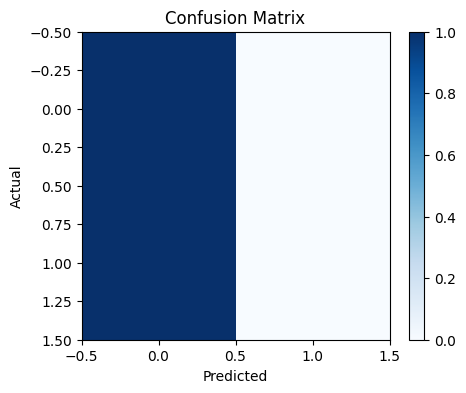

Model and vectorizer saved!
Sample Review Prediction: positive


In [3]:
# --- Step 1: Install & Import Libraries ---
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# --- Step 2: Load CSV Dataset ---
from google.colab import files
uploaded = files.upload()  # Upload 'customer_reviews.csv'

df = pd.read_csv("/content/customer_reviews.csv")
print("Dataset shape:", df.shape)
df.head()

# --- Step 3: Preprocessing ---
def clean_text(text):
    text = str(text).lower()                   # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)      # Remove punctuation/non-alpha
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['clean_review'] = df['review'].apply(clean_text)
df.head()

# --- Step 4: Train-Test Split ---
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 5: TF-IDF Vectorization ---
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# --- Step 6: Train Logistic Regression Model ---
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# --- Step 7: Evaluate Model ---
y_pred = model.predict(X_test_vec)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Step 8: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# --- Step 9: Save Model & Vectorizer ---
joblib.dump(model, "customer_sentiment_model.joblib")
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")
print("Model and vectorizer saved!")

# --- Step 10: Predict Function ---
def predict_sentiment(review):
    cleaned = clean_text(review)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    return pred

# Example
sample_review = "The product quality is excellent and delivery was fast!"
print("Sample Review Prediction:", predict_sentiment(sample_review))
